In [1]:
#Machine learning algorithm: Tensorflow
import tensorflow as tf
from tensorflow import keras
from keras import layers
#Multiple Math Functions
from tensorflow import math
from keras.utils.vis_utils import plot_model
#Test if using Tensorflow GPU
if(tf.config.list_physical_devices('GPU')):
    print("Yes")

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
import mplfinance as mpf
%matplotlib inline
import statsmodels.api as sm
import seaborn as sns

import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go

import cufflinks as cf # Connects Plotly to Pandas
# Makes Plotly work in your Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

import requests # Get URL data
from bs4 import BeautifulSoup # Manipulate URL data
import json
from pandas import DataFrame as df

Using TensorFlow backend.


What is a Tensor? Tensor is a multidimensional array of vectors
The following are tensors:
- [.1, .2, .3] is called a vector
-[1] is called a scalar
-[[1, 2, 3], [4, 5, 6]] is called a matrix
-[[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]] is called a tensor

In [2]:
#tensorflow
#Used for deep learning applications, including neural networks, convolutional neural networks, recurrent neural networks, and others.
#A bunch of numbers are used to predict other numbers.
#import the data
nba_data = pd.read_csv( "https://raw.githubusercontent.com/derekbanas/tensorflow/main/nba_salary_stats.csv")
nba_data.head()


,first_name,last_name,team,salary,pos,age,g,gs,mp,fg,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,Precious,Achiuwa,TOR,2711280.0,C,22,73,28,1725,265,...,0.595,146,327,473,82,37,41,84,151,664
1,Bam,Adebayo,MIA,28103550.0,C,24,56,56,1825,406,...,0.753,137,427,564,190,80,44,148,171,1068
2,LaMarcus,Aldridge,BRK,2641691.0,C,36,47,12,1050,252,...,0.873,73,185,258,42,14,47,44,78,607
3,Grayson,Allen,MIL,4054695.0,SG,26,66,61,1805,255,...,0.865,32,190,222,100,46,18,43,96,733
4,Jarrett,Allen,CLE,20000000.0,C,23,56,56,1809,369,...,0.708,192,410,602,92,44,75,94,97,904


In [ ]:
#Delete Unknown Data
nba_data.isna().sum() #check for missing values
#if there is missimg data
#nba_data = nba_data.dropna()

In [4]:
#Delete Unneeded Data
#Tensorflow only uses numeric data so we can delete the rest
nba_data_numeric = nba_data.copy()
del nba_data_numeric["first_name"]
del nba_data_numeric["last_name"]
del nba_data_numeric["team"]
del nba_data_numeric["pos"]
nba_data_numeric

,salary,age,g,gs,mp,fg,fga,fg%,3p,3pa,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,2711280.0,22,73,28,1725,265,603,0.439,56,156,...,0.595,146,327,473,82,37,41,84,151,664
1,28103550.0,24,56,56,1825,406,729,0.557,0,6,...,0.753,137,427,564,190,80,44,148,171,1068
2,2641691.0,36,47,12,1050,252,458,0.550,14,46,...,0.873,73,185,258,42,14,47,44,78,607
3,4054695.0,26,66,61,1805,255,569,0.448,159,389,...,0.865,32,190,222,100,46,18,43,96,733
4,20000000.0,23,56,56,1809,369,545,0.677,1,10,...,0.708,192,410,602,92,44,75,94,97,904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,2239200.0,25,50,0,459,37,98,0.378,21,70,...,0.833,21,68,89,34,14,3,16,47,110
285,13666667.0,26,68,67,2094,440,878,0.501,131,336,...,0.623,110,576,686,155,54,65,126,171,1218
286,8526316.0,29,77,8,1452,122,269,0.454,44,116,...,0.857,50,170,220,188,93,19,45,56,342
287,1489065.0,23,56,12,706,130,247,0.526,1,11,...,0.623,85,209,294,49,17,20,41,84,299


In [5]:
#Convert Currency to float (USD)
def clean_currency(x):
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return (x)

#apply function to data
nba_data_numeric["salary"] = nba_data_numeric["salary"].apply(clean_currency).astype('float')
nba_data_numeric

,salary,age,g,gs,mp,fg,fga,fg%,3p,3pa,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,2711280.0,22,73,28,1725,265,603,0.439,56,156,...,0.595,146,327,473,82,37,41,84,151,664
1,28103550.0,24,56,56,1825,406,729,0.557,0,6,...,0.753,137,427,564,190,80,44,148,171,1068
2,2641691.0,36,47,12,1050,252,458,0.550,14,46,...,0.873,73,185,258,42,14,47,44,78,607
3,4054695.0,26,66,61,1805,255,569,0.448,159,389,...,0.865,32,190,222,100,46,18,43,96,733
4,20000000.0,23,56,56,1809,369,545,0.677,1,10,...,0.708,192,410,602,92,44,75,94,97,904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,2239200.0,25,50,0,459,37,98,0.378,21,70,...,0.833,21,68,89,34,14,3,16,47,110
285,13666667.0,26,68,67,2094,440,878,0.501,131,336,...,0.623,110,576,686,155,54,65,126,171,1218
286,8526316.0,29,77,8,1452,122,269,0.454,44,116,...,0.857,50,170,220,188,93,19,45,56,342
287,1489065.0,23,56,12,706,130,247,0.526,1,11,...,0.623,85,209,294,49,17,20,41,84,299


In [6]:
print(np.shape(nba_data_numeric))
print(nba_data_numeric.describe())

(289, 27)
             salary         age           g          gs           mp  \
count  2.890000e+02  289.000000  289.000000  289.000000   289.000000   
mean   8.972877e+06   25.768166   56.619377   30.415225  1373.657439   
std    1.008679e+07    4.378557   18.081042   26.947104   698.833132   
min    5.318000e+03   19.000000    9.000000    0.000000    35.000000   
25%    2.033160e+06   22.000000   47.000000    5.000000   799.000000   
50%    4.259259e+06   25.000000   62.000000   21.000000  1406.000000   
75%    1.242000e+07   29.000000   70.000000   57.000000  1931.000000   
max    4.578097e+07   38.000000   82.000000   80.000000  2743.000000   

               fg          fga         fg%          3p         3pa  ...  \
count  289.000000   289.000000  289.000000  289.000000  289.000000  ...   
mean   237.546713   514.283737    0.458730   74.276817  208.335640  ...   
std    164.543135   347.674340    0.072096   63.139612  166.382283  ...   
min      3.000000    13.000000    0.23100

BOXPLOTS: used for checking for outliers in datasets
- boxplot is a way to check for outliers
- We might eventually have to get rid of the outliers

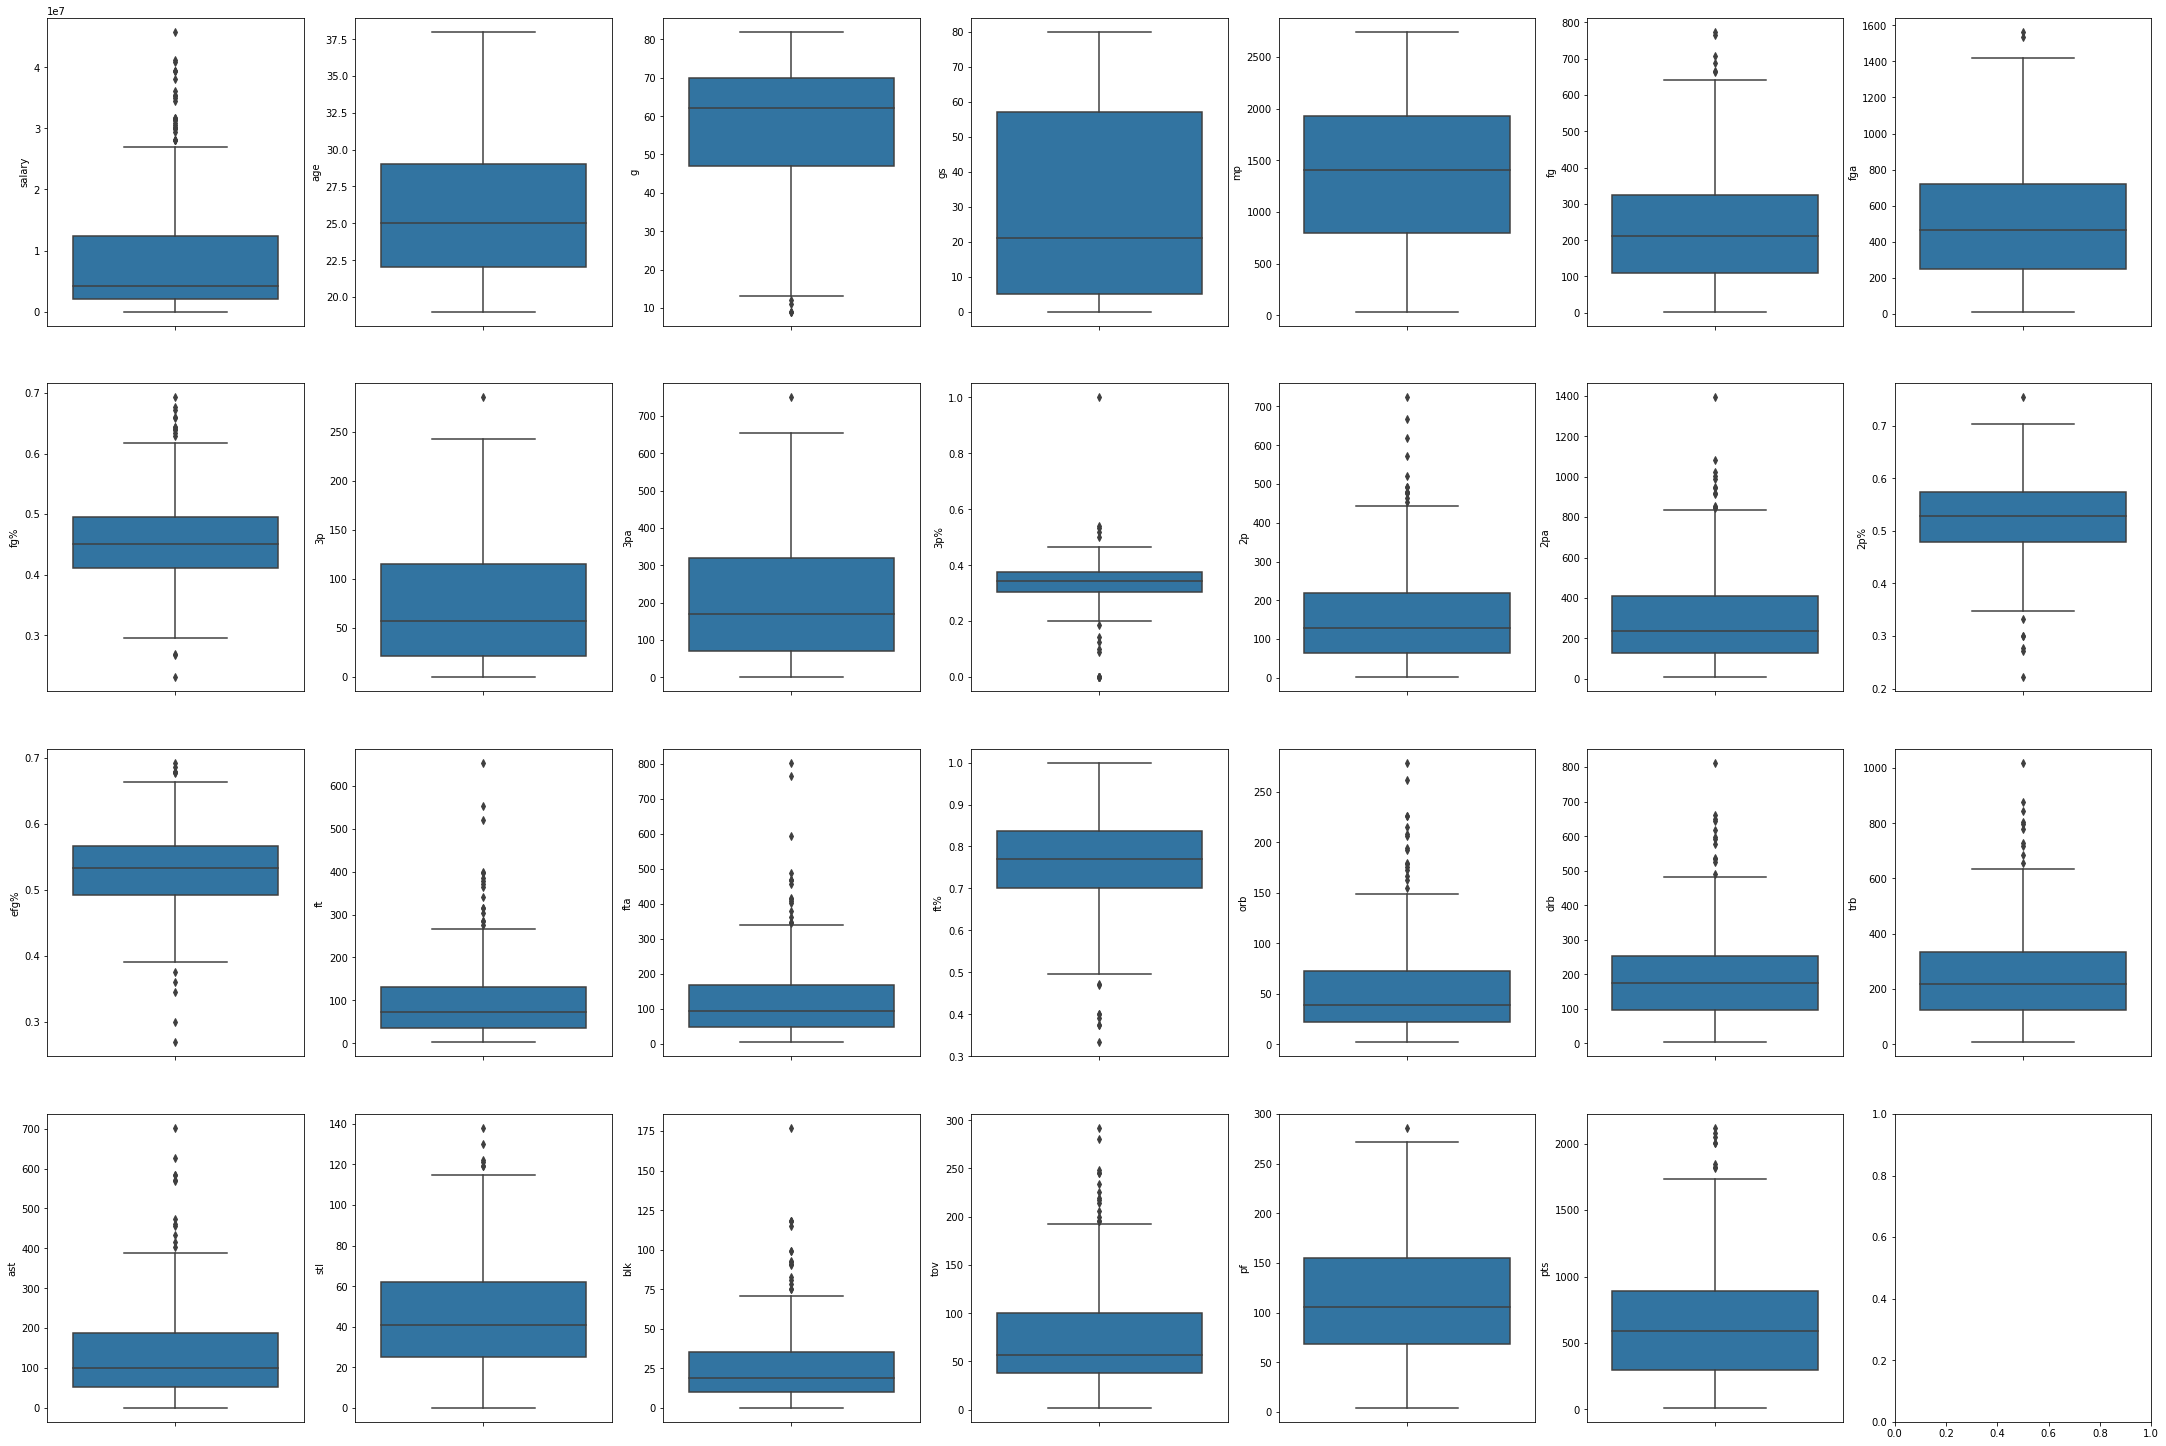

In [7]:
# A box plot allows you to compare different variables
# The box shows the quartiles of the data. The bar in the middle is the median and
# the box extends 1 standard deviation from the median
# The whiskers extend to all the other data aside from the points that are considered
# to be outliers
fig, axs = plt.subplots(ncols=7, nrows=4, figsize=(30, 20))
index = 0
axs = axs.flatten()
for k,v in nba_data_numeric.items():
    # sns.boxplot(y=k, data=nba_data, ax=axs[index])
    sns.boxplot(y=k, data=nba_data_numeric, ax=axs[index]) 
    index += 1 #increment index to move to next plot/row
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# Outliers are extreme values that differ from the vast majority of the data.
# They can have a big impact on the results of your hypothesis
# Since salary is what we are interested in and it has many outliers that could be an issue

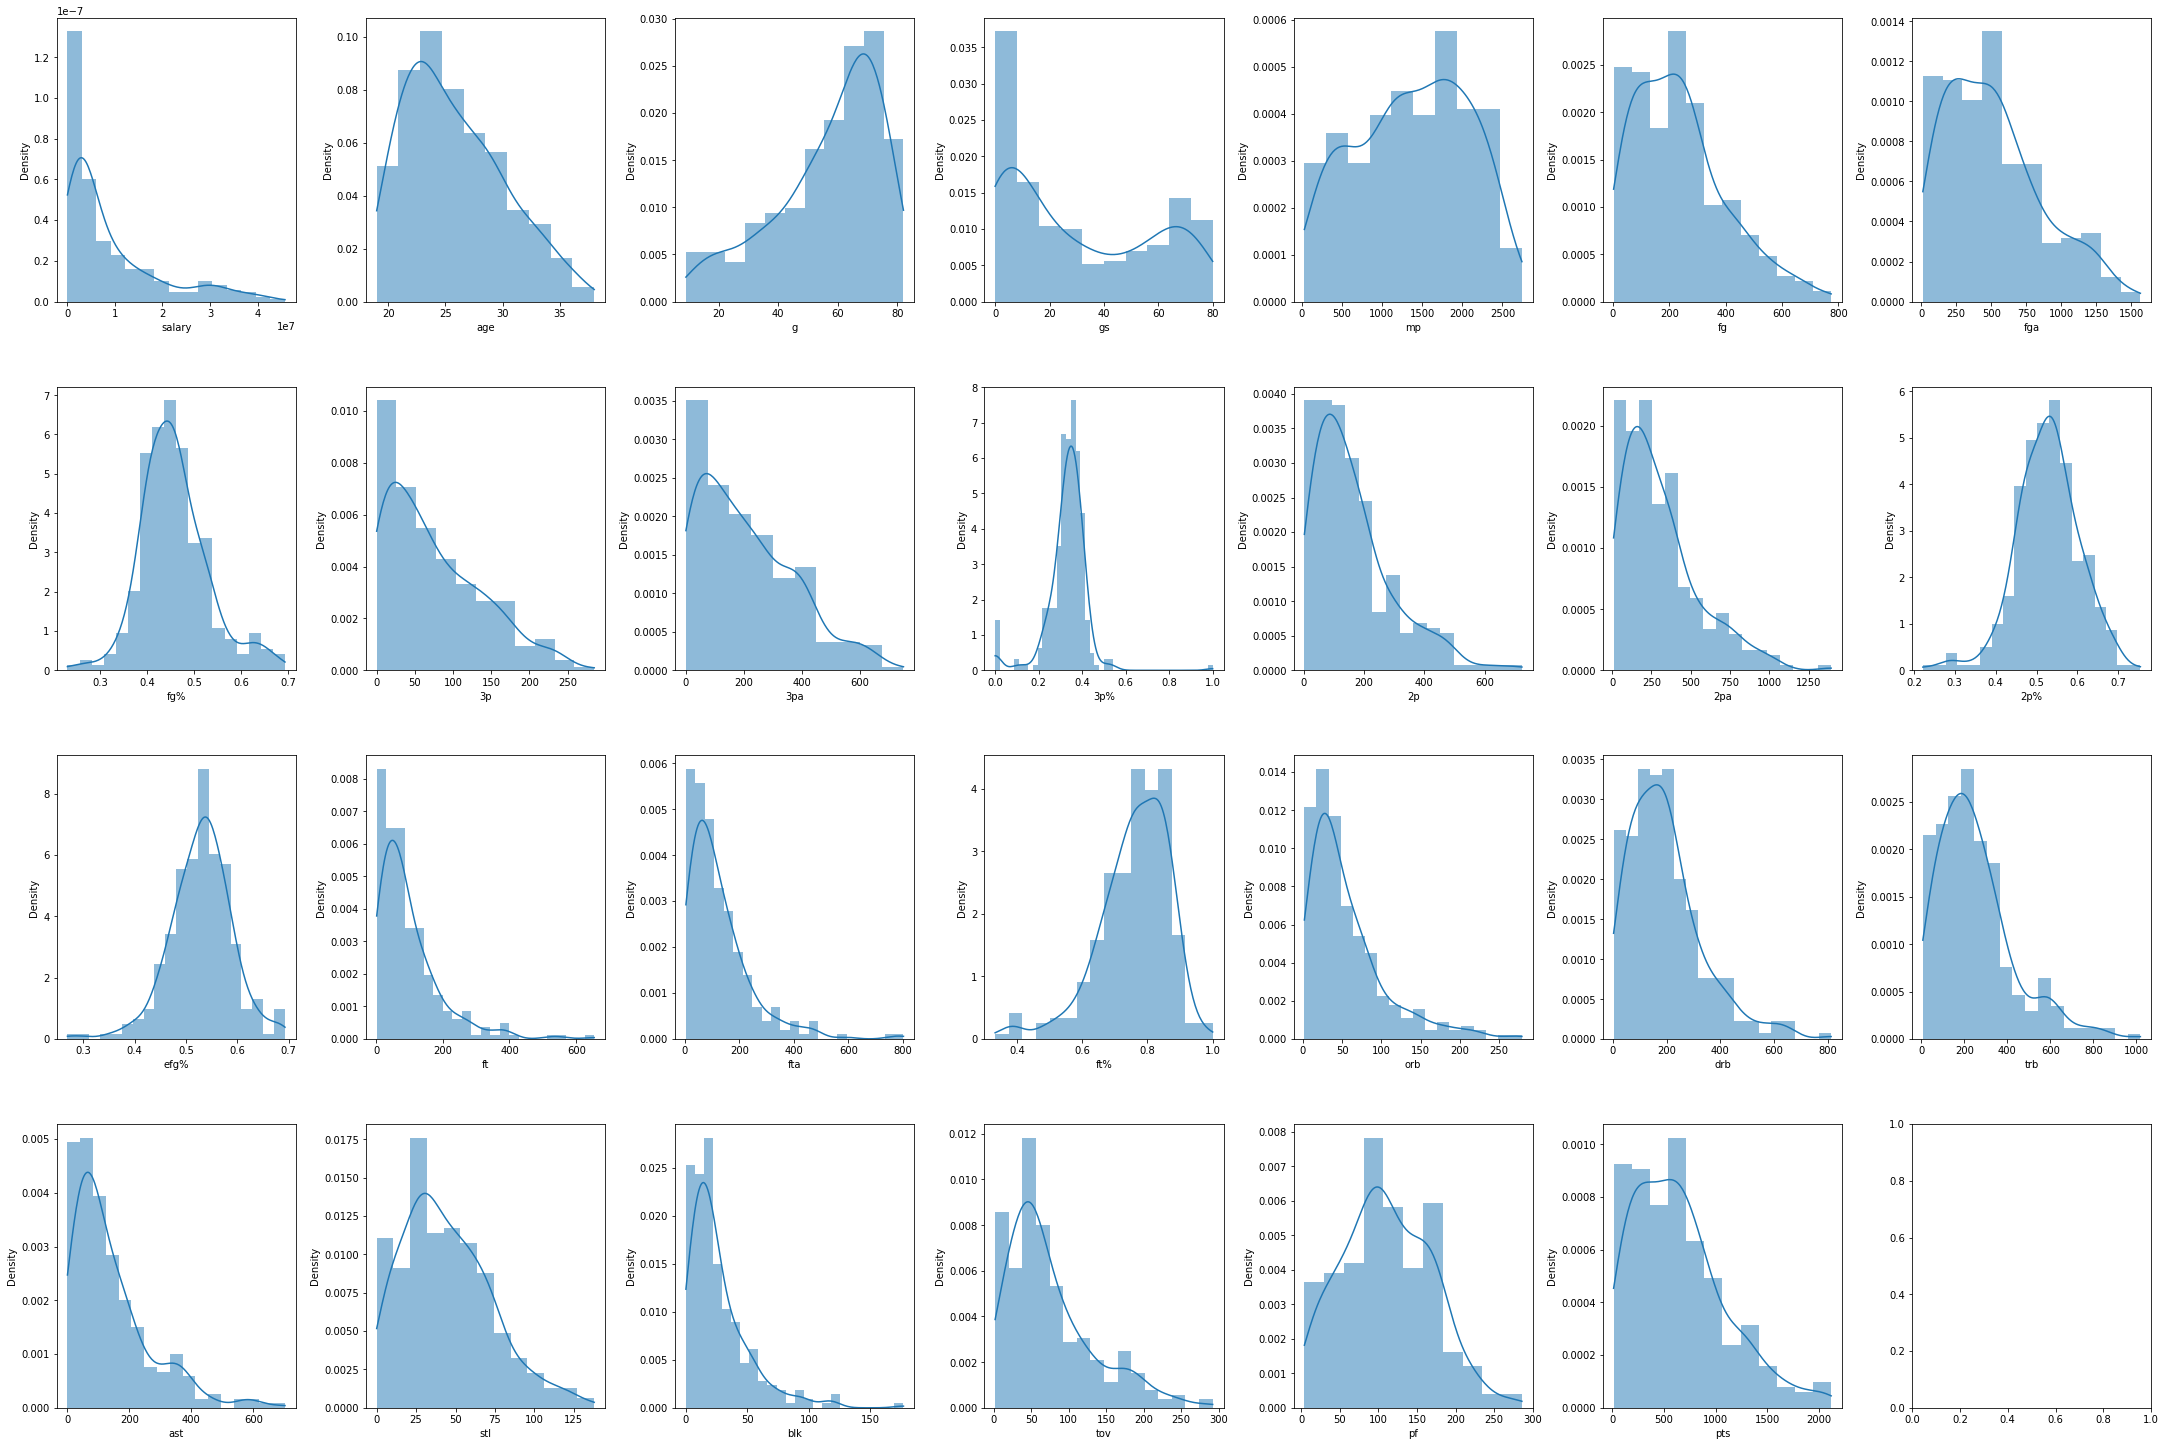

In [11]:
#HISTOGRAM PLOT
fig, axs = plt.subplots(ncols=7, nrows=4, figsize=(30, 20))
index = 0
axis = axs.flatten()
for k,v in nba_data_numeric.items():
    # sns.hisplot(y=k, data=nba_data, ax=axs[index])
    sns.histplot(v, ax=axis[index], kde = True, stat = "density", linewidth=0) 
    index += 1 #increment index to move to next plot/row
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

#field goal percentage is a normal distribution


Correlation Matrix: used to check for linear relationships between variables, and to check for multicollinearity(checking if certain factors affect the variable we are analysing ). In this case we are checking what variables are correlated with Nba Players Salary. We can do this for Wins, Losses and Championships.

<AxesSubplot:>

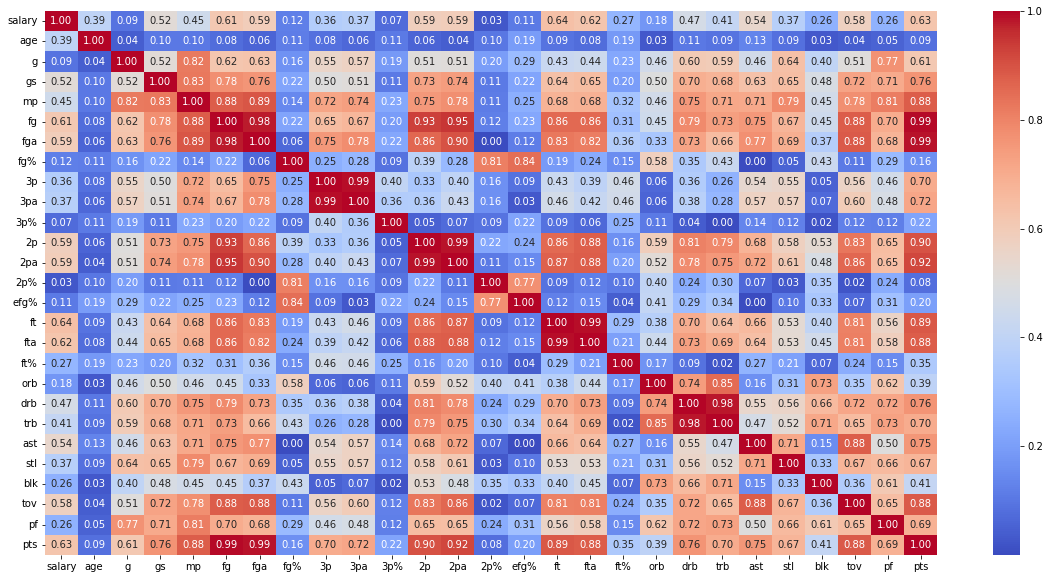

In [15]:
#Correlation Matrix tells us how much each variable is correlated with each other
plt.figure(figsize=(20,10))
sns.heatmap(nba_data_numeric.corr().abs(), annot=True, fmt='.2f', cmap='coolwarm')

<generator object DataFrame.items at 0x000001188D1BE430>

Each Variable is 100% correlated to itself, hence the value is 1.00

Get Percentage of Outliers:

In [9]:
#Get Percentage of outliers (48:49)
for k,v in nba_data_numeric.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    iqr = q3 - q1
    v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(nba_data_numeric)[0]
    print("%s Percentage of Outliers = %.2f%%" % (k, perc))

salary Percentage of Outliers = 9.69%
age Percentage of Outliers = 0.00%
g Percentage of Outliers = 1.73%
gs Percentage of Outliers = 0.00%
mp Percentage of Outliers = 0.00%
fg Percentage of Outliers = 2.08%
fga Percentage of Outliers = 0.69%
fg% Percentage of Outliers = 4.84%
3p Percentage of Outliers = 0.35%
3pa Percentage of Outliers = 0.35%
3p% Percentage of Outliers = 6.57%
2p Percentage of Outliers = 4.50%
2pa Percentage of Outliers = 4.15%
2p% Percentage of Outliers = 2.42%
efg% Percentage of Outliers = 3.81%
ft Percentage of Outliers = 5.54%
fta Percentage of Outliers = 5.54%
ft% Percentage of Outliers = 2.77%
orb Percentage of Outliers = 5.54%
drb Percentage of Outliers = 4.15%
trb Percentage of Outliers = 3.46%
ast Percentage of Outliers = 4.15%
stl Percentage of Outliers = 2.08%
blk Percentage of Outliers = 5.54%
tov Percentage of Outliers = 4.84%
pf Percentage of Outliers = 0.35%
pts Percentage of Outliers = 2.77%


Tensorflow Neural Network Regressions
Tensors are a way to represent data in a computer, they represent the data as a vector.
Create Constant Tensor

In [22]:
#Create Constant Tensor
scalar = tf.constant(5.0)
scalar

<tf.Tensor: shape=(), dtype=float32, numpy=5.0>

In [23]:
#Create a Vector
vector  = tf.constant([10,10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10])>

In [26]:
#Create a Matrix
matrix = tf.constant([[1,2],[3,4]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]])>

In [28]:
#Create a Tensor
tensor = tf.constant([[1,2,3], [4, 5, 6], [7, 8, 9]])
tensor

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])>